# STEP 1 Pre-processing and exploring data

### In this section, we are pre-processing and exploring the audio files  that will be fed into our algorithms.

In [ ]:
#Uncommented this section if you need to install this package
#pip install librosa

In [3]:
# Required libraries
import tarfile
import os
import pandas as pd
import numpy as np
import pygame
import random
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

In [4]:
#This function, called unpacking, is used to unpack all .tar files in a given folder. It takes two arguments: folder_path, which is the path to the folders containing the files, and destination, which is the path to the destination folder where the contents of the .tar files will be extracted.
def unpacking(folder_path, destination):
# list of all files in the folder
    file_list = os.listdir(folder_path)
    #opening all files in the folder
    for file_name in file_list:
        if file_name.endswith('.tar.gz'):
            # Constructing full file path 
            file_path = os.path.join(folder_path, file_name)
            # open file
            with tarfile.open(file_path, 'r:gz') as file:
                # extracting file
                file.extractall(path = destination)
            print("Unpacked " + file_name)
        elif file_name.endswith('.tar'):
            file_path = os.path.join(folder_path, file_name)
            # open file
            with tarfile.open(file_path, 'r:') as file:
                # extracting file
                file.extractall(path = destination)
            print("Unpacked " + file_name)
        else:
            print("Skipping " + file_name + " because not a .tar/.tag.gz file.")

In [5]:
folder_path = "/Users/Andee/Documents/CBS - Data Science/Second Semester/Machine Learning/Assignments/MLAssignments/FinalProject"
destination = os.path.join(folder_path, "unpacked")

In [6]:
# Uncommented if you want to unpack the files
#unpacking(folder_path, destination)

In [7]:
SAMPLE_RATE = 22550 # This is not the sample rate of wav? But I don't think is required because is the default value.
TRACK_DURATION = 30 # measured in seconds #Most of the audios are 10 seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

In [10]:
# Function to sample mp3 files
def sample_audio(language_mp3_path):
    language_list = os.listdir(language_mp3_path)
    language_dic = {"it" : "Italian",
                   "es" : "Spanish"}
    for language in language_list:
        language_path = os.path.join(language_mp3_path, language)

        # Skip non-directory items
        if not os.path.isdir(language_path):
            continue

        if language in language_dic:
            language_name = language_dic[language]
        else:
            print("Unknown language!")
            language_name = language

        clips_path = os.path.join(language_path, "clips")
        # get a list of all files in the folder
        mp3_list = os.listdir(clips_path)
        # choose a random file from the list
        random_file = random.choice(mp3_list)
        # Play random file 
        print("Playing a random file in the following language " + language_name)
        print(random_file)
        mp3_path = os.path.join(clips_path, random_file)

        # Numerical presentation of audio data  
        y,sr = sf.read(mp3_path)
        print(y)
        print(sr)

        # Check if the audio signal is non-empty
        if len(y) > 0:
            # Play the random MP3 file
            pygame.mixer.init()
            pygame.mixer.music.load(mp3_path)
            pygame.mixer.music.play()
            while pygame.mixer.music.get_busy():
                pygame.time.Clock().tick(10)

            # Plot raw waveform
            plt.figure(figsize=(16, 6))
            librosa.display.waveshow(y=y, sr=sr, color="#A300F9", axis='s')
            plt.title("Raw audio example sound waves in " + language_name, fontsize=20)
            plt.show()

            # Summary information
            print('y shape:', len(y))
            print('Sample Rate (KHz):', sr)
            # Verify length of the audio
            print('Check Len of Audio:', int(len(y))/int(sr))
            print('\n')

            # transform y into melspectogram represenation
            y_melspec = librosa.amplitude_to_db(np.abs(librosa.stft(y) ), ref=np.max)
            # plot melspectogram
            plt.figure(figsize = (16, 6))
            librosa.display.specshow(y_melspec, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log')
            plt.colorbar()
            plt.title("Melspectogram representation", fontsize = 20)
            plt.show()

            # transform y into MFCC represenation
            y_mfcc = librosa.feature.mfcc(y=y, sr=sr)
            # plot MFCC
            plt.figure(figsize = (16, 6))
            librosa.display.specshow(y_mfcc, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log')
            plt.colorbar()
            plt.title("MFCC representation", fontsize = 20)
            plt.show()

        else:
            print(f"Skipping {random_file} because it has no samples.")

Playing a random file in the following language Italian
common_voice_it_35289036.mp3
[ 0.00000000e+00  3.21290412e-13  1.01374660e-12 ... -2.02183161e-04
 -1.63558478e-04 -3.06116817e-05]
32000


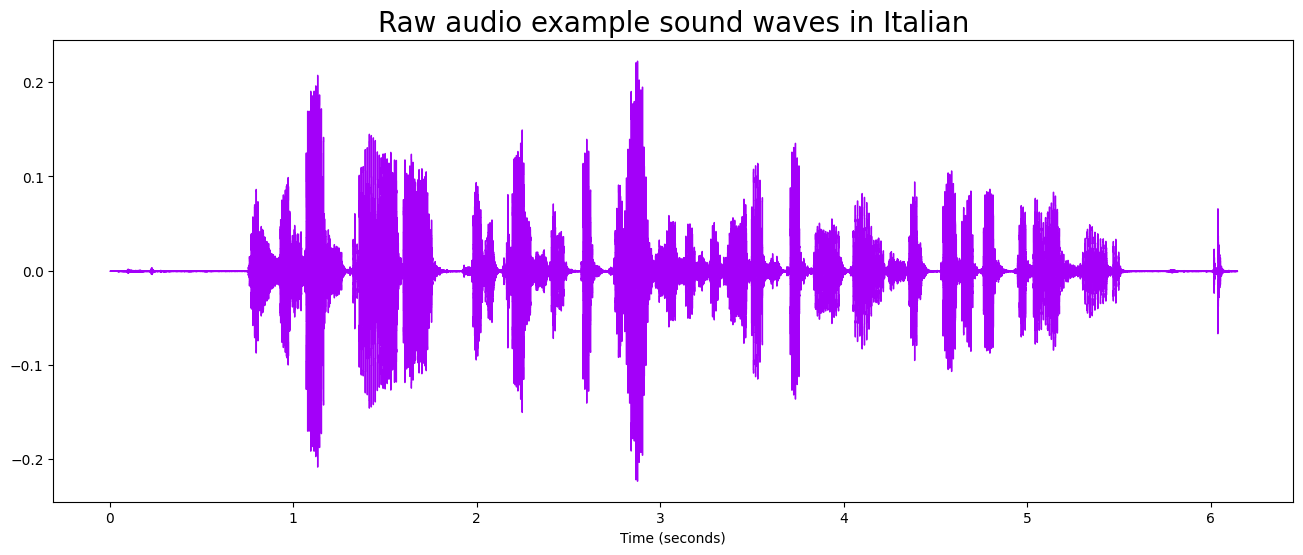

y shape: 196608
Sample Rate (KHz): 32000
Check Len of Audio: 6.144




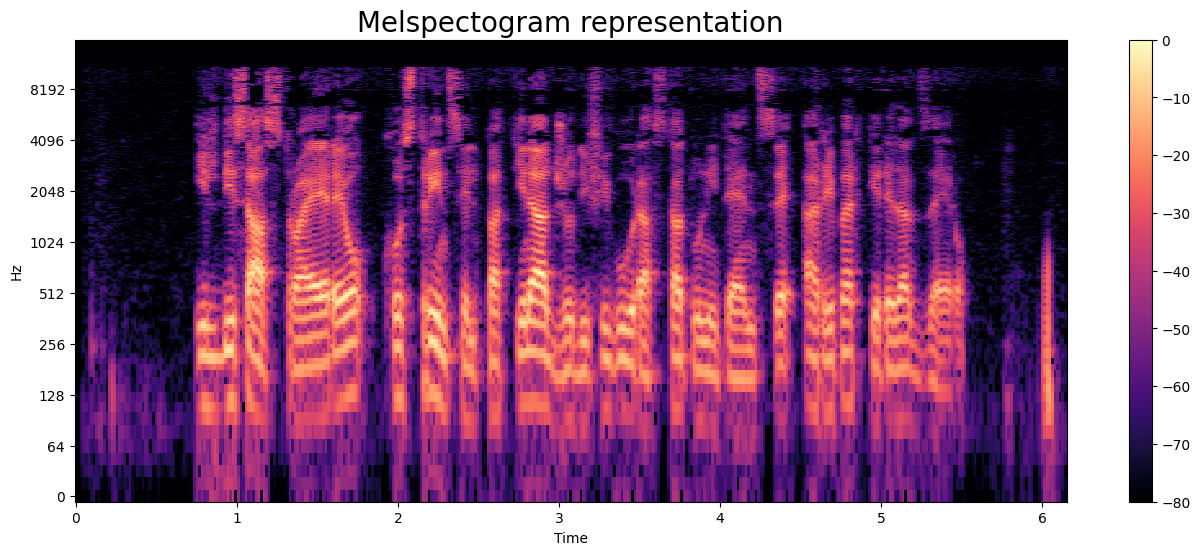

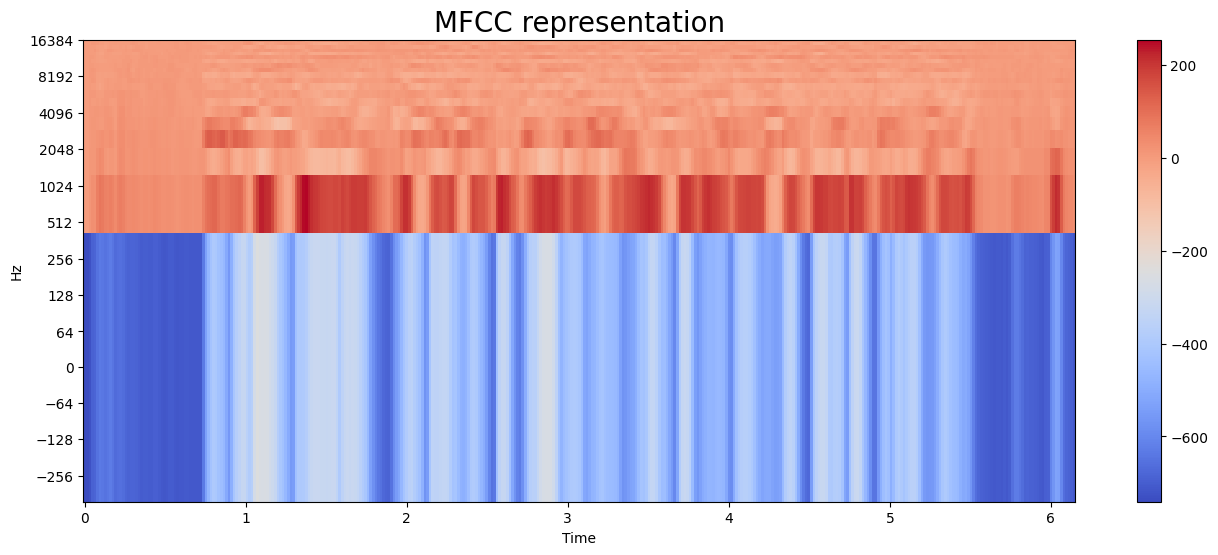

In [11]:
language_mp3_path = "/Users/Andee/Documents/CBS - Data Science/Second Semester/Machine Learning/Assignments/MLAssignments/FinalProject/unpacked/cv-corpus-12.0-delta-2022-12-07"
sample_audio(language_mp3_path)

In [ ]:
# Minimum audio data length

In [ ]:
# data load parameters
dataset_path = root_path + '/data/genres_original'
num_segments = 1
SAMPLES_PER_SEGMENT = int(SAMPLES_PER_TRACK / num_segments)

In [23]:
language_mp3_path = "/Users/Andee/Documents/CBS - Data Science/Second Semester/Machine Learning/Assignments/MLAssignments/FinalProject/unpacked/cv-corpus-12.0-delta-2022-12-07"

data = {
    "filename": [],
    "language": [],
    "tracks": []
    }


#num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

language_list = os.listdir(language_mp3_path)
language_dic = {"it" : "Italian",
                "es" : "Spanish"}

for language in language_list:
    language_path = os.path.join(language_mp3_path, language)
    # Skip non-directory items
    if not os.path.isdir(language_path):
        continue
    if language in language_dic:
        language_name = language_dic[language]
    else:
        print("Unknown language!")
        language_name = language

    clips_path = os.path.join(language_path, "clips")
        
    # get a list of all files in the folder
    mp3_list = os.listdir(clips_path)
    
    # looping through all mp3s in one language
    for mp3 in mp3_list:
        # adding the filename as key
        data["filename"].append(mp3)
        # adding the label/language
        data["language"].append(language_name)
        # adding the clip
        data["tracks"].append(sf.read(os.path.join(clips_path,  mp3)))


In [24]:
print(data)

{'filename': ['common_voice_it_35120759.mp3', 'common_voice_it_35392147.mp3', 'common_voice_it_35163674.mp3', 'common_voice_it_35270868.mp3', 'common_voice_it_35219606.mp3', 'common_voice_it_35392621.mp3', 'common_voice_it_34930009.mp3', 'common_voice_it_36312203.mp3', 'common_voice_it_35303138.mp3', 'common_voice_it_35104823.mp3', 'common_voice_it_35774147.mp3', 'common_voice_it_36349207.mp3', 'common_voice_it_35111590.mp3', 'common_voice_it_35208737.mp3', 'common_voice_it_35270854.mp3', 'common_voice_it_35920669.mp3', 'common_voice_it_35101973.mp3', 'common_voice_it_35120765.mp3', 'common_voice_it_35120003.mp3', 'common_voice_it_34930035.mp3', 'common_voice_it_35327918.mp3', 'common_voice_it_35283062.mp3', 'common_voice_it_35207362.mp3', 'common_voice_it_35188825.mp3', 'common_voice_it_35412246.mp3', 'common_voice_it_34930021.mp3', 'common_voice_it_34937028.mp3', 'common_voice_it_35120771.mp3', 'common_voice_it_35067348.mp3', 'common_voice_it_36069635.mp3', 'common_voice_it_35208723.

In [25]:
len(data["filename"])

8202

In [26]:
len(data["language"])

8202

In [27]:
len(data["tracks"])

8202